In [498]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_trial_df = pd.merge(mouse_df,trial_df,on='Mouse ID')

# Display the data table for preview
mouse_trial_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [499]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
volume_by_time_df = mouse_trial_df[['Mouse ID','Drug','Timepoint','Tumor Volume (mm3)']]
volume_by_time_gdf = volume_by_time_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
# source reference:
#https://stackoverflow.com/questions/13582449/convert-dataframegroupby-object-to-dataframe-pandas
volume_by_time_df =  volume_by_time_gdf.aggregate(np.mean)

# Preview DataFrame
volume_by_time_df = volume_by_time_df.reset_index()
volume_by_time_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [500]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_volume_by_time_gdf =  volume_by_time_gdf.sem()

# Convert to DataFrame
sem_volume_by_time_df = pd.DataFrame(sem_volume_by_time_gdf)
sem_volume_by_time_df = sem_volume_by_time_df['Tumor Volume (mm3)']
sem_volume_by_time_df = sem_volume_by_time_df.reset_index()

# Preview DataFrame
sem_volume_by_time_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [501]:
# Minor Data Munging to Re-Format the Data Frames
sem_volume_by_time_df = sem_volume_by_time_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
sem_volume_by_time_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [502]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_by_time_df = volume_by_time_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_volume_by_time_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


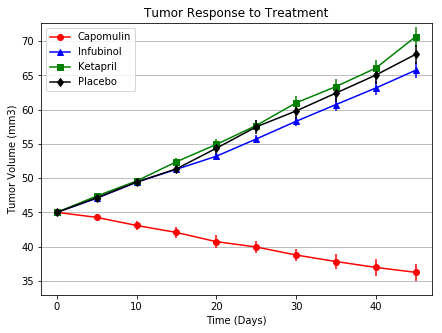

In [503]:
# Generate the Plot (with Error Bars)
tumor_volume_by_time_df.columns
days = tumor_volume_by_time_df.index

Capomulin_avg = tumor_volume_by_time_df['Capomulin']
Capomulin_err = sem_volume_by_time_df['Capomulin']
Infubinol_avg = tumor_volume_by_time_df['Infubinol']
Infubinol_err = sem_volume_by_time_df['Infubinol']
Ketapril_avg = tumor_volume_by_time_df['Ketapril']
Ketapril_err = sem_volume_by_time_df['Ketapril']
Placebo_avg = tumor_volume_by_time_df['Placebo']
Placebo_err = sem_volume_by_time_df['Placebo']
fig,ax = plt.subplots(figsize=(7,5))
ax.errorbar(days,Capomulin_avg,yerr=Capomulin_err,color='red',marker='o',label='Capomulin')
ax.errorbar(days,Infubinol_avg,yerr=Infubinol_err,color='blue',marker='^',label='Infubinol')
ax.errorbar(days,Ketapril_avg,yerr=Ketapril_err,color='green',marker='s',label='Ketapril')
ax.errorbar(days,Placebo_avg,yerr=Placebo_err,color='black',marker='d',label='Placebo')

# Create a legend for our chart
ax.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Set x and y limits
ax.set_xlim(min(days)-2, max(days)+2)
ax.set_ylim(min(volume_by_time_df['Tumor Volume (mm3)'])-2, max(volume_by_time_df['Tumor Volume (mm3)'])+2)

#Source reference: 
# https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib/48077809
ax.grid(True,which='major',axis='y')

# Save the Figure
#Source reference:
# https://stackoverflow.com/questions/4325733/save-a-subplot-in-matplotlib
fig.savefig('../Images/treatment.png')

## Observation
* Of the 4 drugs focused on in this chart, the Capomulin is the only drug that saw a reduction in Tumor volume over the 
Treatment Period
* Ketapril saw the highest tumor growth over the treatment even over Placebo
* The standard error of the mean increased gradually over the treatment period.

## Metastatic Response to Treatment

In [504]:
mouse_trial_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [505]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_by_time_df = mouse_trial_df[['Mouse ID','Drug','Timepoint','Metastatic Sites']]
meta_by_time_gdf = meta_by_time_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
meta_by_time_df =  meta_by_time_gdf.aggregate(np.mean)

# Preview DataFrame
meta_by_time_df = meta_by_time_df.reset_index()
meta_by_time_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [506]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_meta_by_time_gdf = meta_by_time_gdf.sem()

# Convert to DataFrame
sem_meta_by_time_df = pd.DataFrame(sem_meta_by_time_gdf) 
sem_meta_by_time_df = sem_meta_by_time_df['Metastatic Sites']
sem_meta_by_time_df = sem_meta_by_time_df.reset_index()

# Preview DataFrame
sem_meta_by_time_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [507]:
# Minor Data Munging to Re-Format the Data Frames
sem_meta_sites_by_time_df = sem_meta_by_time_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
sem_meta_sites_by_time_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [508]:
# Minor Data Munging to Re-Format the Data Frames
meta_sites_by_time_df = meta_by_time_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
meta_sites_by_time_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


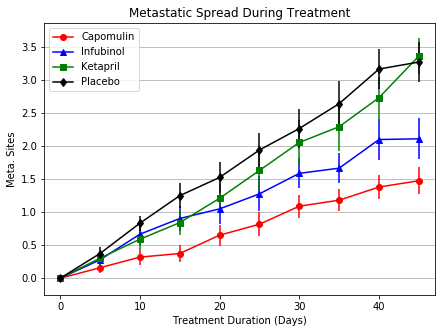

In [509]:
# Generate the Plot (with Error Bars)
meta_sites_by_time_df.columns
days = tumor_volume_by_time_df.index

Capomulin_meta_avg = meta_sites_by_time_df['Capomulin']
Capomulin_meta_err = sem_meta_sites_by_time_df['Capomulin']
Infubinol_meta_avg = meta_sites_by_time_df['Infubinol']
Infubinol_meta_err = sem_meta_sites_by_time_df['Infubinol']
Ketapril_meta_avg = meta_sites_by_time_df['Ketapril']
Ketapril_meta_err = sem_meta_sites_by_time_df['Ketapril']
Placebo_meta_avg = meta_sites_by_time_df['Placebo']
Placebo_meta_err = sem_meta_sites_by_time_df['Placebo']
fig,ax = plt.subplots(figsize=(7,5))
ax.errorbar(days,Capomulin_meta_avg,yerr=Capomulin_meta_err,color='red',marker='o',label='Capomulin')
ax.errorbar(days,Infubinol_meta_avg,yerr=Infubinol_meta_err,color='blue',marker='^',label='Infubinol')
ax.errorbar(days,Ketapril_meta_avg,yerr=Ketapril_meta_err,color='green',marker='s',label='Ketapril')
ax.errorbar(days,Placebo_meta_avg,yerr=Placebo_meta_err,color='black',marker='d',label='Placebo')

# Create a legend for our chart
ax.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Meta. Sites")

# Set x and y limits
ax.set_xlim(min(days)-2, max(days)+2)
ax.set_ylim(min(meta_by_time_df['Metastatic Sites']-.25), max(meta_by_time_df['Metastatic Sites'])+.5)

#Source reference: 
# https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib/48077809
ax.grid(True,which='major',axis='y')

# Save the Figure
#Source reference:
# https://stackoverflow.com/questions/4325733/save-a-subplot-in-matplotlib
fig.savefig('../Images/spread.png')


## Observation
* Of the 4 drugs focused on in this chart, the Capomulin had the lowest Metastatic Spread of Tumors over the 
Treatment Period
* Ketapril ended up having the highest Metastatic Spread of Tumor over the treatment period, even higher than Placebo.
* The standard error of the mean gradually increased over the treatment period with Capomulin having the least standard
error of the mean.

## Survival Rates

In [510]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_gdf = mouse_trial_df[['Mouse ID','Drug','Timepoint']]
mice_gdf = mice_gdf.groupby(['Drug','Timepoint']).count()
 
# Convert to DataFrame
mice_df = pd.DataFrame(mice_gdf)
mice_df = mice_df.reset_index()

mice_df = mice_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [511]:
# Minor Data Munging to Re-Format the Data Frames
mice_survival_df = mice_df.pivot(index='Timepoint',columns='Drug', values='Mouse Count' )

# Preview the Data Frame
mice_survival_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


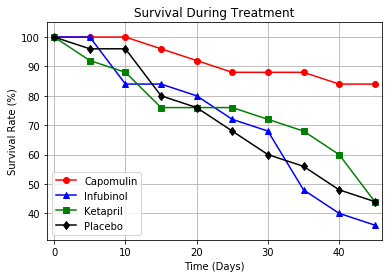

In [512]:
# Generate the Plot (with Error Bars)
mice_survival_df= mice_survival_df[['Capomulin','Infubinol','Ketapril','Placebo']]

days = mice_survival_df.index

Capomulin_count_avg = mice_survival_df['Capomulin']/mice_survival_df['Capomulin'].max()*100

Infubinol_count_avg = mice_survival_df['Infubinol']/mice_survival_df['Infubinol'].max()*100

Ketapril_count_avg = mice_survival_df['Ketapril']/mice_survival_df['Ketapril'].max()*100

Placebo_count_avg = mice_survival_df['Placebo']/mice_survival_df['Placebo'].max()*100

all_survival = Capomulin_count_avg
all_survival = all_survival.append(Infubinol_count_avg)
all_survival = all_survival.append(Ketapril_count_avg)
all_survival = all_survival.append(Placebo_count_avg)

Capomulin, = plt.plot(days,Capomulin_count_avg,color='red',marker='o',label='Capomulin')
Infubinol, = plt.plot(days,Infubinol_count_avg,color='blue',marker='^',label='Infubinol')
Ketapril, = plt.plot(days,Ketapril_count_avg,color='green',marker='s',label='Ketapril')
Placebo, = plt.plot(days,Placebo_count_avg,color='black',marker='d',label='Placebo')

# Create a legend for our chart
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo], loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Set x and y limits
plt.xlim(min(days)-1, max(days)+1)
plt.ylim(min(all_survival)-5, max(all_survival)+5)

#Source reference: 
# https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib/48077809
plt.grid(True,which='major',axis='both')

# Save the Figure
#Source reference:
# https://stackoverflow.com/questions/4325733/save-a-subplot-in-matplotlib
plt.savefig('../Images/survival.png')
plt.show()

## Observation
* Of the 4 drugs focused on in this chart, the Capomulin saw the highest survival rate over the
Treatment Period
* Infubinol had the lowest survival rate, even below Placebo.
* Ultimately, Ketapril and Placebo had the same survival rate at the end of the treatment period.

## Summary Bar Graph

In [513]:
tumor_volume_by_time_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [514]:
# Calculate the percent changes for each drug
#source reference:
#https://stackoverflow.com/questions/25476880/using-dataframe-ix-with-a-tuple-index-in-pandas
sub_tumor_volume_by_time_df = tumor_volume_by_time_df[['Capomulin','Infubinol','Ketapril','Placebo']]
change = (sub_tumor_volume_by_time_df.ix[45] - sub_tumor_volume_by_time_df.ix[0])/ sub_tumor_volume_by_time_df.ix[0]*100

# Display the data to confirm
change


Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [515]:
# Store all Relevant Percent Changes into a Tuple
change = tuple(zip(change.index,change))

change

(('Capomulin', -19.475302667894173),
 ('Infubinol', 46.12347172785187),
 ('Ketapril', 57.028794686606076),
 ('Placebo', 51.29796048315153))

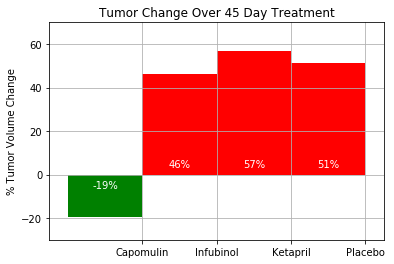

In [516]:
#set the axis 
x=range(len(change))
y=  [val[1] for val in change]
bars = [val[0] for val in change]

yticks = np.arange(-20,70,20)

#Color the bars based on pass/fail
#source reference :
#https://github.com/pandas-dev/pandas/issues/18449
c = pd.DataFrame(y)
colors = tuple(np.where(c[0]<0, 'g', 'r'))

fig, ax = plt.subplots()
tumor_bar = ax.bar(x, y,width=-1,align='edge',color=colors)

# Orient widths. Add labels, tick marks, etc. 
plt.xticks(x,bars)
plt.yticks(yticks)

ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.grid(True,which='major',axis='both')

# Set x and y limits
ax.set_xlim(-1.25, len(x)-.75)
ax.set_ylim(-30, 70)

#source references:
#https://matplotlib.org/3.1.1/gallery/pyplots/text_layout.html#sphx-glr-gallery-pyplots-text-layout-py
#https://www.geeksforgeeks.org/python-math-copysign-function/
#https://www.edureka.co/community/47722/example-showing-way-create-grouped-bar-chart-with-matplotlib
# Use functions to label the percentages of changes
def autolabel(bars):
    """
    Attach a text label on each bar displaying its value
    """
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.,math.copysign(5,height),
                '%d%%' % int(height),
                ha='center',va='center',color='white')

# Call functions to implement the function calls
autolabel(tumor_bar)

# Save the Figure
fig.savefig('../Images/change.png')

# Show the Figure
plt.show()

## Observation
* Of the 4 drugs focused on in this chart, the Capomulin is the only drug that saw a reduction in Tumor volume over the 
Treatment Period